

```
## This is formatted as code
```

# JULY MINOR PROJECT

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split
LABELS=["normal","fraud"]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#UNDERSTANDING DATA
data = pd.read_csv("/content/drive/MyDrive/card_transdata.csv")
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


In [ ]:
data.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1,1,0,0,0
999996,19.872726,2.683904,2.778303,1,1,0,0,0
999997,2.914857,1.472687,0.218075,1,1,0,1,0
999998,4.258729,0.242023,0.475822,1,0,0,1,0
999999,58.108125,0.318110,0.386920,1,1,0,1,0


In [ ]:
data.shape

(1000000, 8)

In [ ]:
#STATISTICS SUMMARY OF THE FEATURES
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723670,11851.104560,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#data types of all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  int64  
 4   used_chip                       1000000 non-null  int64  
 5   used_pin_number                 1000000 non-null  int64  
 6   online_order                    1000000 non-null  int64  
 7   fraud                           1000000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 61.0 MB


In [ ]:
#DATA ANALYSIS

In [ ]:
data.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

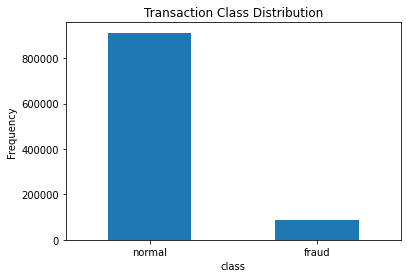

In [ ]:
count_classes = pd.value_counts(data["fraud"],sort=True)
count_classes.plot(kind = 'bar',rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2),LABELS)
plt.xlabel("class")
plt.ylabel("Frequency")

In [ ]:
## Get the Fraud and the normal dataset

fraud = data[data['fraud']==1]

normal = data[data['fraud']==0]

In [ ]:
print(fraud.shape,normal.shape)

(87403, 8) (912597, 8)


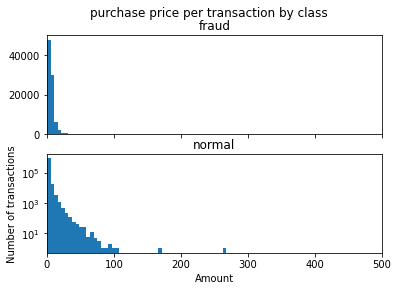

In [ ]:
f,(ax1,ax2)=plt.subplots(2,1,sharex=True)
f.suptitle("purchase price per transaction by class")
bins=50
ax1.hist(fraud.ratio_to_median_purchase_price,bins = bins)
ax1.set_title("fraud")
ax2.hist(normal.ratio_to_median_purchase_price,bins=bins)
ax2.set_title("normal")
plt.xlabel("Amount")
plt.ylabel("Number of transactions")
plt.xlim((0,500))
plt.yscale("log")
plt.show()


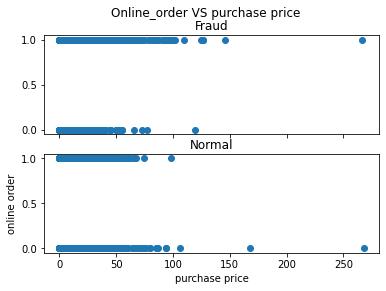

In [ ]:
#SCATTER PLOT
f,(ax1,ax2)=plt.subplots(2,1,sharex=True)
f.suptitle("Online_order VS purchase price")
ax1.scatter(fraud.ratio_to_median_purchase_price,fraud.online_order)
ax1.set_title('Fraud')
plt.ylabel('online order')
plt.xlabel('purchase price')
ax2.scatter(normal.ratio_to_median_purchase_price,normal.online_order)
ax2.set_title('Normal')
plt.ylabel('online order')
plt.xlabel('purchase price')
plt.show()

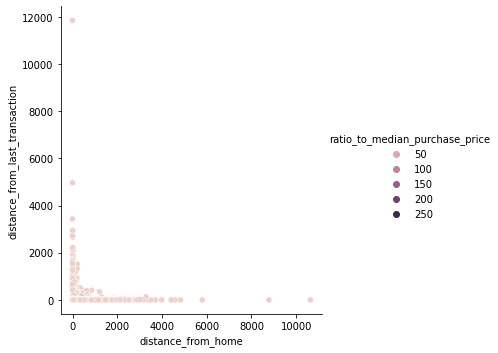

In [ ]:
from scipy.spatial.kdtree import distance_matrix
sns.relplot(x='distance_from_home',y='distance_from_last_transaction',hue='ratio_to_median_purchase_price',data=data)

In [ ]:
#RELATIONSHIP ANALYSIS
corr=data.corr()

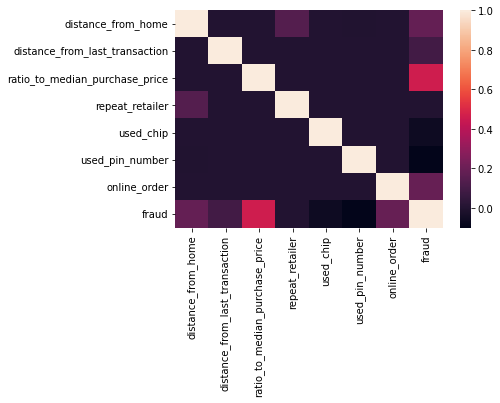

In [ ]:
sns.heatmap(corr)

In [ ]:
y=data.fraud
x=data.drop("fraud",axis=1)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
# TESTING AND TRAINING DATASET
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=2/3,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#from sklearn.linear_model import LogisticRegression
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(x_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [ ]:
pipe.score(x_test, y_test)

0.9586660826678347

In [ ]:
print(pipe.predict(x_test))

[0 0 0 ... 0 0 0]


In [ ]:
len(fraud)

87403

912597

In [ ]:
#CONCLUSION
# ACCURACY OF ML MODEL IS O.96 PERCENTAGE....